## Data-X - project

In [107]:
"""
!pip install imblearn
!pip install xgboost
!pip install functions
"""

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [13]:
# Basics
import numpy as np
import pandas as pd
from collections import Counter
from scipy import stats

In [14]:
# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff

In [15]:
# Modelling
from sklearn.model_selection import (train_test_split, RandomizedSearchCV, GridSearchCV, ParameterGrid, learning_curve)
from sklearn.preprocessing import (MinMaxScaler, LabelEncoder)
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score)
from sklearn import metrics
from xgboost import XGBClassifier

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
seed = 543

In [18]:
# Setting the number of decimal places to 2
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [19]:
url = 'https://raw.githubusercontent.com/12Simi3/Data_X_2023/main/data/raw/penguins.csv'
data = pd.read_csv(url)

# Data preprocessing

### Exploratory analysis

In [20]:
print('(rows, columns):', data.shape)
print('The dataset has', len(data), 'rows and all the observations should be unique.') 

(rows, columns): (363, 8)
The dataset has 363 rows and all the observations should be unique.


In [21]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.10,18.70,181.00,3750.00,male,2007
1,Adelie,Torgersen,39.50,17.40,186.00,3800.00,female,2007
2,Adelie,Torgersen,40.30,18.00,195.00,3250.00,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.70,19.30,193.00,3450.00,female,2007


In [22]:
data.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
358,Chinstrap,Dream,43.50,18.10,202.00,3400.00,female,2009
359,Chinstrap,Dream,49.60,18.20,193.00,3775.00,male,2009
360,Chinstrap,Dream,50.80,19.00,210.00,4100.00,male,2009
361,Chinstrap,Dream,50.20,18.70,198.00,3775.00,female,2009
362,Chinstrap,Dream,NaN,NaN,NaN,NaN,NaN,2009


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            363 non-null    object 
 1   island             363 non-null    object 
 2   bill_length_mm     358 non-null    float64
 3   bill_depth_mm      358 non-null    float64
 4   flipper_length_mm  357 non-null    float64
 5   body_mass_g        358 non-null    float64
 6   sex                349 non-null    object 
 7   year               363 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 22.8+ KB


In [24]:
print('Unique values for categorical columns:')
for col in ['species', 'island', 'sex', 'year']:
    print(col+ ':', list(data[col].unique()))

Unique values for categorical columns:
species: ['Adelie', 'Gentoo', 'Chinstrap']
island: ['Torgersen', 'Biscoe', 'Dream']
sex: ['male', 'female', nan]
year: [2007, 2008, 2009]


The penguins dataset has **363 observations**, **7 independent variables** and 1 dependent variable. **5** of the features **are numerical** and **2 are categorical** (year can be treated as categorical). The **target variable consists of 3 categories**.

The columns:

* **species**: penguin species (Chinstrap, Adélie, or Gentoo)
* **island**: island name (Dream, Torgersen, or Biscoe) 
* **bill_length_mm**: bill length (mm)
* **bill_depth_mm**: bill depth (mm)
* **flipper_length_mm**: flipper length (mm)
* **body_mass_g**: body mass (g)
* **sex**: penguin sex
* **year**: year

We can see that there are some **missing values** in the data that need to be handled (deleted or imputed). Also the **data types** of some columns should be corrected.

In [25]:
# Categorical variables
for i in list(data.columns[data.dtypes == 'object']):
    data[i] = data[i].astype('category')
data['year'] = data['year'].astype('category')
data.dtypes

species              category
island               category
bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
year                 category
dtype: object

In [26]:
# Checking missing values per columns
data.isna().sum()

species               0
island                0
bill_length_mm        5
bill_depth_mm         5
flipper_length_mm     6
body_mass_g           5
sex                  14
year                  0
dtype: int64

In [27]:
# Checking missing values per rows
data['nans'] = data.isnull().sum(axis=1)
data[data['nans'] > 0].sort_values(by = ['nans'], ascending = False).head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,nans
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,5
287,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009,5
337,Chinstrap,Dream,NaN,NaN,NaN,NaN,NaN,2009,5
346,Chinstrap,Dream,NaN,NaN,NaN,NaN,NaN,2009,5
362,Chinstrap,Dream,NaN,NaN,NaN,NaN,NaN,2009,5
8,Adelie,Torgersen,34.10,18.10,193.00,3475.00,NaN,2007,1
9,Adelie,Torgersen,42.00,20.20,190.00,4250.00,NaN,2007,1
10,Adelie,Torgersen,37.80,17.10,186.00,3300.00,NaN,2007,1
11,Adelie,Torgersen,37.80,17.30,180.00,3700.00,NaN,2007,1
37,Adelie,Biscoe,37.50,18.60,NaN,3150.00,female,2007,1


Rows with too many missing data (5 of 7 explanatory variables) will be deleted. Rows with 1 missing value will be imputed after splitting the data set into training and testing part.

In [28]:
# Deleting rows with too many NaNs
data = data.loc[(data['nans'] < 5)]

# Deleting column with counted NaNs
data = data.drop('nans', axis=1)

In [29]:
# Checking missing values for columns
data.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    1
body_mass_g          0
sex                  9
year                 0
dtype: int64

In [30]:
# Checking for duplicates
print('There are',data.duplicated().sum(), 'duplicated rows.')

# Displaying the duplicated rows along with their original row
data[data.duplicated(keep = False)].sort_values(by = list(data.columns))

There are 11 duplicated rows.


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.10,18.70,181.00,3750.00,male,2007
16,Adelie,Torgersen,39.10,18.70,181.00,3750.00,male,2007
19,Adelie,Torgersen,39.10,18.70,181.00,3750.00,male,2007
1,Adelie,Torgersen,39.50,17.40,186.00,3800.00,female,2007
17,Adelie,Torgersen,39.50,17.40,186.00,3800.00,female,2007
20,Adelie,Torgersen,39.50,17.40,186.00,3800.00,female,2007
2,Adelie,Torgersen,40.30,18.00,195.00,3250.00,female,2007
18,Adelie,Torgersen,40.30,18.00,195.00,3250.00,female,2007
21,Adelie,Torgersen,40.30,18.00,195.00,3250.00,female,2007
233,Chinstrap,Dream,45.20,17.80,198.00,3950.00,female,2007


In [31]:
# Deleting duplicates
data.drop_duplicates(inplace = True)

In [32]:
print('(rows, columns):', data.shape)
print('After the deletion of duplicates, the dataset has', len(data), 'rows and all the observations are unique.') 

(rows, columns): (347, 8)
After the deletion of duplicates, the dataset has 347 rows and all the observations are unique.


In [33]:
# Checking the values of numerical variables
numerical_statistics = pd.concat([
    data.describe(include = np.number).iloc[0:1],
    data.mode(numeric_only = True).rename(index = {0:'mode'}),
    pd.DataFrame(data.median(numeric_only = True), columns = ['median']).T,
    data.describe(include = np.number).iloc[1:8],
    ])
numerical_statistics

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,347.00,347.00,346.00,347.00
mode,41.10,17.00,190.00,3800.00
median,44.50,17.30,197.00,4000.00
mean,43.94,17.17,200.81,4191.35
std,5.46,1.97,14.02,801.49
min,32.10,13.10,172.00,2700.00
25%,39.25,15.60,190.00,3550.00
50%,44.50,17.30,197.00,4000.00
75%,48.50,18.70,213.00,4750.00
max,59.60,21.50,231.00,6300.00


In [34]:
# Checking the values of categorical variables
data.describe(include = 'category')

,species,island,sex,year
count,347,347,338,347
unique,3,3,2,3
top,Adelie,Biscoe,male,2009
freq,153,169,170,119


### Data visualisation

In [35]:
# Defining the colors
species_colors = {'Adelie': 'brown', 'Chinstrap': 'coral', 'Gentoo': 'gold'}
islands_colors = {'Torgersen':'pink', 'Biscoe':'violet', 'Dream':'indigo'}

#### Categorical variables

In [36]:
# Count the frequency of each value in the 'species' and 'island' columns and create a bar charts
species_counts = Counter(data['species'])
island_counts = Counter(data['island']) 

fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("Species Counts", "Islands Counts"), shared_yaxes = True)

fig.add_trace(go.Bar(x = list(species_counts.keys()), y = list(species_counts.values()), marker_color = [species_colors[s] for s in species_counts.keys()]), 
              row = 1, col = 1)

fig.add_trace(go.Bar(x = list(island_counts.keys()), y = list(island_counts.values()), marker_color = [islands_colors[s] for s in island_counts.keys()]),
              row = 1, col = 2)

fig.update_layout(height = 500, width = 1500, showlegend = False, font = dict(size = 15))
fig.show()

print('Count of each species: ' + str(species_counts))
print('Count of each island: ' + str(island_counts))

Count of each species: Counter({'Adelie': 153, 'Gentoo': 123, 'Chinstrap': 71})
Count of each island: Counter({'Biscoe': 169, 'Dream': 127, 'Torgersen': 51})


Distribution of the target variable seems to be slightly imbalanced. The **Adelie** is the majority specie, followed by **Gentoo** and the third specie causing the major imbalance is **Chinstrap** specie.

Cross-validation will be used to overcome the imbalance.

Depending on the performance of the classification models, it will be decided if an upsampling is necessary.

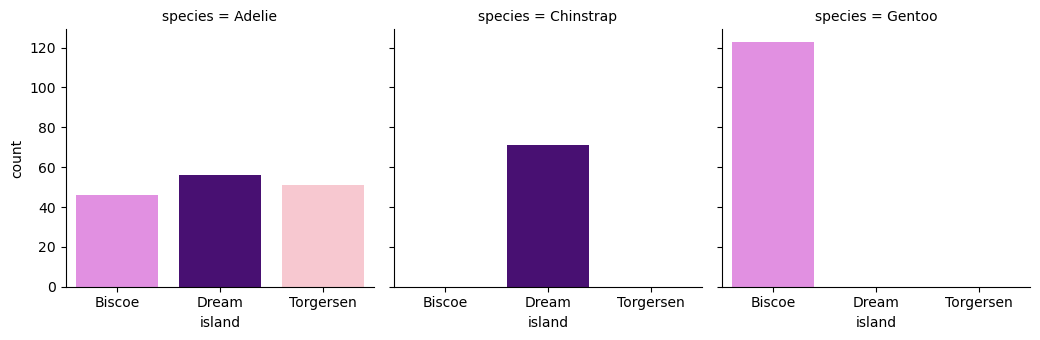

In [37]:
# Show more detail - combine the above graphs
fig2 = px.bar(data, x = 'island', color = 'species', title = "Species per Island", color_discrete_map = species_colors)
fig2.update_layout(autosize = False, width = 800, height = 500, font = dict(size = 15))
fig2.show()

sns.catplot(data = data, x = 'island', col = 'species', kind = 'count', height = 3.5, palette = islands_colors)

From the graph showing species distribution per islands it is visible that:

1) on the **Torgersen** island only the **Adelie** specie can be found, 

2) **Gentoo** specie lives only on **Biscoe** island, and 

3) **Chinstrap** specie lives only on **Dream** island.

In [38]:
# Count the frequency of each value in the 'year' column and create a bar chart
year_counts = Counter(data['year'])

fig = go.Figure(data = [go.Bar(x = list(year_counts.keys()), y = list(year_counts.values()), marker_color = ['darkcyan', 'cadetblue', 'darkturquoise'])])
fig.update_layout(title = "Observations per Year", autosize = False, width = 800, height = 500, font = dict(size = 15))
fig.show()

print('Observations in years: ' + str(year_counts))

Observations in years: Counter({2009: 119, 2007: 114, 2008: 114})


Number of observations each year is balanced.

In [39]:
# Count the frequency of each value in the 'sex' column and create a donut chart
data['sex'] = np.where(data['sex'].isna(), 'unknown', data['sex']) # replace NaNs with a placeholder value and add a new category for them
sex_counts = data['sex'].value_counts()

fig0 = px.pie(names = sex_counts.index, values = sex_counts.values, title = 'Sex Distribution', labels = {'names': 'Sex', 'values': 'Count'}, hole = 0.4)
fig0.update_layout(autosize = False, width = 700, height = 400, font = dict(size = 15))
fig0.show()

print('Count of each sex: ' + str(Counter(data['sex'])))

Count of each sex: Counter({'male': 170, 'female': 168, 'unknown': 9})


In [40]:
# Show more detail
fig1 = px.bar(data, x='species', color='sex', color_discrete_sequence = ['red', 'blue', 'green'])
fig2 = px.bar(data, x='island', color='sex', color_discrete_sequence = ['red', 'blue', 'green'])
fig3 = px.bar(data, x='year', color='sex', color_discrete_sequence = ['red', 'blue', 'green'])

figures = [fig1, fig2, fig3]

fig = make_subplots(rows = 1, cols = len(figures), subplot_titles = ("per Specie", "per Island", "per Year"), shared_yaxes = True) 

for i, figure in enumerate(figures):
    for trace in range(len(figure['data'])):
        fig.append_trace(figure['data'][trace], row = 1, col = i+1)

fig.update_layout(height = 400, width = 1500, showlegend = False, font = dict(size = 15))
fig.show()

All the graphs above show that **sex variable is balanced throughout the dataset** as a whole, per species, per island, as well as per year.

#### Numerical variables

<img src='https://drive.google.com/uc?export=view&id=1wFmMUpf-zvhFh9MxRq2x9k19qNXHHi7M' width="500">

In [41]:
# Histogram of bill_length_mm per species
fig2 = ff.create_distplot([data[data['species'] == sp]['bill_length_mm'] for sp in data['species'].unique()], 
                          data['species'].unique(), 
                          bin_size = 1, 
                          show_rug = False, 
                          colors = [species_colors[sp] for sp in data['species'].unique()])

fig2.update_layout(autosize = False, width = 800, height = 500, title_text = 'Histogram of bill_length_mm per species')
fig2.show()

# Violin plot
fig3 = go.Figure(data = [go.Violin(x = data['species'], y = data['bill_length_mm'], box_visible = True, fillcolor = 'lightblue')])
fig3.update_layout(autosize = False, width = 800, height = 500, title_text = 'Violin plot of bill_length_mm per species', font = dict(size = 15))
fig3.show()

The **Adelie** specie seems to have **shorter bills** on average compared to other species.

In [42]:
# Histogram of bill_depth_mm per species
fig2 = ff.create_distplot([data[data['species'] == sp]['bill_depth_mm'] for sp in data['species'].unique()], 
                          data['species'].unique(), 
                          bin_size = 0.3, 
                          show_rug = False, 
                          colors = [species_colors[sp] for sp in data['species'].unique()])

fig2.update_layout(autosize = False, width = 800, height = 500, title_text = 'Histogram of bill_depth_mm per species')
fig2.show()

# Violin plot
fig3 = go.Figure(data = [go.Violin(x = data['species'], y = data['bill_depth_mm'], box_visible = True, fillcolor = 'lightblue')])
fig3.update_layout(autosize = False, width = 800, height = 500, title_text = 'Violin plot of bill_depth_mm per species')
fig3.show()

The **Gentoo** specie seems to have **less deep bills** on average compared to other species.

In [43]:
# Histogram of flipper_length_mm per species
data_dropped = data.dropna(subset=['flipper_length_mm']) # dropping NaN values for plotting purposes

fig2 = ff.create_distplot([data_dropped[data_dropped['species'] == sp]['flipper_length_mm'] for sp in data_dropped['species'].unique()], 
                          data_dropped['species'].unique(), 
                          bin_size = 2, 
                          show_rug = False, 
                          colors = [species_colors[sp] for sp in data_dropped['species'].unique()])

fig2.update_layout(autosize = False, width = 800, height = 500, title_text = 'Histogram of flipper_length_mm per species')
fig2.show()

# Violin plot
fig3 = go.Figure(data = [go.Violin(x = data['species'], y = data['flipper_length_mm'], box_visible = True, fillcolor = 'lightblue')])
fig3.update_layout(autosize = False, width = 800, height = 500, title_text = 'Violin plot of flipper_length_mm per species')
fig3.show()

The **Gentoo** specie seems to have **longer flippers** on average compared to other species.

In [44]:
# Histogram of body_mass_g per species
fig2 = ff.create_distplot([data[data['species'] == sp]['body_mass_g'] for sp in data['species'].unique()], 
                          data['species'].unique(), 
                          bin_size = 100, 
                          show_rug = False, 
                          colors = [species_colors[sp] for sp in data['species'].unique()])

fig2.update_layout(autosize = False, width = 800, height = 500, title_text = 'Histogram of body_mass_g per species')
fig2.show()

# Violin plot
fig3 = go.Figure(data = [go.Violin(x = data['species'], y = data['body_mass_g'], box_visible = True, fillcolor = 'lightblue')])
fig3.update_layout(autosize = False, width = 800, height = 500, title_text = 'Violin plot of body_mass_g per species')
fig3.show()

The **Gentoo** specie seems to have **bigger body mass** on average compared to other species.

In [45]:
# Scatter plots for numerical variables
sns_pairplot = sns.pairplot(data, hue = "species", vars = ['body_mass_g', 'flipper_length_mm', 'bill_depth_mm', 'bill_length_mm'], corner = True, palette = species_colors)

In [46]:
"""
# Downloading the plot
sns_pairplot.figure.savefig("pairplot.png")
files.download("pairplot.png")
"""

'\n# Downloading the plot\nsns_pairplot.figure.savefig("pairplot.png")\nfiles.download("pairplot.png")\n'

In [49]:
# Checking for correlation between independent numerical variables
# Checking for correlation between independent numerical variables
sns.set(rc = {'figure.figsize':(9, 7)})
sns_heatmap = sns.heatmap(data.corr(numeric_only = True, method = 'spearman'), annot = True)

TypeError: corr() got an unexpected keyword argument 'numeric_only'

In [50]:
"""
# Downloading the plot
sns_heatmap.figure.savefig("heatmap.png")
files.download("heatmap.png")
"""

'\n# Downloading the plot\nsns_heatmap.figure.savefig("heatmap.png")\nfiles.download("heatmap.png")\n'

In [51]:
# Checking for correlation between all variables
dummies = pd.get_dummies(data)
sns.set(rc = {'figure.figsize':(15, 10)})
sns.heatmap(data = dummies.corr(method = 'spearman'),
            annot = True,
            cmap = 'BuPu',
            fmt = '.2f', 
            linewidth = 0)

<AxesSubplot:>

From both the pairplot and the correlogram we can see that the columns flipper_length_mm and body_mass_g are strongly positively correlated - **the higher the body mass, the longer the flipper**.

In [52]:
print('Correlation between flipper_length_mm and body_mass_g:', data['flipper_length_mm'].corr(data['body_mass_g'], method = 'spearman'))
print('Correlation between flipper_length_mm and bill_length_mm:', data['flipper_length_mm'].corr(data['bill_length_mm'], method = 'spearman'))

Correlation between flipper_length_mm and body_mass_g: 0.8388794856065648
Correlation between flipper_length_mm and bill_length_mm: 0.664822600227636


We decided to **delete two columns**:

* the column **flipper_length_mm** because of high correaltion with two other features (body_mass_g and bill_lenght_m) and an occurance of a missing value
* the column **year** as it does not bring any additional information about the data (as can be seen on the above graphs)

In [53]:
# Dropping columns
data.drop('flipper_length_mm', axis = 1, inplace = True)
data.drop('year', axis = 1, inplace = True)

### Splitting data

In [54]:
# Encoding the categorical variables
data = pd.get_dummies(data, columns = ['island'], drop_first = False)
data = pd.get_dummies(data, columns = ['sex'], drop_first = True)
data.head()

,species,bill_length_mm,bill_depth_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_male,sex_unknown
0,Adelie,39.10,18.70,3750.00,0,0,1,1,0
1,Adelie,39.50,17.40,3800.00,0,0,1,0,0
2,Adelie,40.30,18.00,3250.00,0,0,1,0,0
4,Adelie,36.70,19.30,3450.00,0,0,1,0,0
5,Adelie,39.30,20.60,3650.00,0,0,1,1,0


In [55]:
# Setting unknown sex to NaN again
data.loc[data['sex_unknown'] == 1, 'sex_male'] = np.nan

# Deleting column 'sex_unknown'
data = data.drop('sex_unknown', axis=1)

In [56]:
# Splitting the data set into training and testing part
x_train, x_test, y_train, y_test = train_test_split(data.drop(['species'], axis = 1),  # explanatory variable
                                                    data[['species']],                 # response variable
                                                    test_size = 0.2,                   # hold out size
                                                    random_state = seed)

In [57]:
# Differences between train and test data
x_train.describe()

,bill_length_mm,bill_depth_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_male
count,277.00,277.00,277.00,277.00,277.00,277.00,268.00
mean,43.84,17.18,4182.40,0.49,0.36,0.16,0.50
std,5.46,1.97,801.98,0.50,0.48,0.36,0.50
min,32.10,13.10,2700.00,0.00,0.00,0.00,0.00
25%,39.20,15.70,3550.00,0.00,0.00,0.00,0.00
50%,43.50,17.50,4000.00,0.00,0.00,0.00,1.00
75%,48.40,18.70,4750.00,1.00,1.00,0.00,1.00
max,58.00,21.50,6300.00,1.00,1.00,1.00,1.00


In [58]:
x_test.describe()

,bill_length_mm,bill_depth_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_male
count,70.00,70.00,70.00,70.00,70.00,70.00,70.00
mean,44.35,17.15,4226.79,0.49,0.40,0.11,0.50
std,5.48,1.98,804.36,0.50,0.49,0.32,0.50
min,34.00,13.60,2850.00,0.00,0.00,0.00,0.00
25%,39.75,15.43,3581.25,0.00,0.00,0.00,0.00
50%,45.25,17.10,4025.00,0.00,0.00,0.00,0.50
75%,48.92,18.77,4787.50,1.00,1.00,0.00,1.00
max,59.60,21.20,6050.00,1.00,1.00,1.00,1.00


In [59]:
# Create a bar chart for train data
species_counts = Counter(y_train['species'])

fig = go.Figure(data = [go.Bar(x = list(species_counts.keys()), y = list(species_counts.values()), marker_color = [species_colors[s] for s in species_counts.keys()])])
fig.update_layout(title = "Species Counts", autosize = False, width = 800, height = 500)
fig.show()

print('Count of each species in the training data: ' + str(species_counts))

Count of each species in the training data: Counter({'Adelie': 125, 'Gentoo': 96, 'Chinstrap': 56})


**Stratified dataset was not used in the model in the end, the results were excellent even without this step**.

In [60]:
'''
# Stratified data
def data_strat(data, strat_columns_name, strat_values, prop_strat, random_state = None):
    
    df_estrat = pd.DataFrame(columns = data.columns) # Create an empty data frame with the names of the columns of dummie_df
    
    pos = -1
    for i in range(len(strat_values)): # Iterate over the input of stratified values
        pos += 1
        if pos == len(strat_values) -1:
            ratio_len = len(data) - len(df_estrat) # Calculates the number of output values having the same number of rows as input
        else:
            ratio_len = int(len(data) * prop_strat[i]) # calculates the number of rows according to the desired ratio
        
        df_filter = data[data[strat_columns_name] == strat_values[i]] # filters the source data based on the values selected in the data layer
        df_temp = df_filter.sample(replace=True, n=ratio_len, random_state=random_state) # sample the filtered data using the ratio we have calculated

        df_estrat = pd.concat([df_estrat, df_temp]) # concat the sample tables with the stratified one to produce the final result

    return df_estrat # Return the stratified, re-sampled data 

  '''

'\n# Stratified data\ndef data_strat(data, strat_columns_name, strat_values, prop_strat, random_state = None):\n    \n    df_estrat = pd.DataFrame(columns = data.columns) # Create an empty data frame with the names of the columns of dummie_df\n    \n    pos = -1\n    for i in range(len(strat_values)): # Iterate over the input of stratified values\n        pos += 1\n        if pos == len(strat_values) -1:\n            ratio_len = len(data) - len(df_estrat) # Calculates the number of output values having the same number of rows as input\n        else:\n            ratio_len = int(len(data) * prop_strat[i]) # calculates the number of rows according to the desired ratio\n        \n        df_filter = data[data[strat_columns_name] == strat_values[i]] # filters the source data based on the values selected in the data layer\n        df_temp = df_filter.sample(replace=True, n=ratio_len, random_state=random_state) # sample the filtered data using the ratio we have calculated\n\n        df_estra

In [ ]:
'''
strat_values = ['Adelie', 'Chinstrap', 'Gentoo']
strat_prop = [0.333, 0.333, 0.333]
train = pd.concat([x_train, y_train], axis = 1) # add the 'species' column

stratified_train = data_strat(train, 'species', strat_values, strat_prop, random_state = seed)

stratified_x_train = stratified_train.drop(['species'], axis = 1)
stratified_y_train = stratified_train[['species']]
'''

"\nstrat_values = ['Adelie', 'Chinstrap', 'Gentoo']\nstrat_prop = [0.333, 0.333, 0.333]\ntrain = pd.concat([x_train, y_train], axis = 1) # add the 'species' column\n\nstratified_train = data_strat(train, 'species', strat_values, strat_prop, random_state = seed)\n\nstratified_x_train = stratified_train.drop(['species'], axis = 1)\nstratified_y_train = stratified_train[['species']]\n"

In [ ]:
'''
# Create a bar chart for stratified train data
species_counts = Counter(stratified_y_train['species'])

fig = go.Figure(data = [go.Bar(x = list(species_counts.keys()), y = list(species_counts.values()), marker_color = [species_colors[s] for s in species_counts.keys()])])
fig.update_layout(title = "Species Counts", autosize = False, width = 800, height = 500)
fig.show()

print('Count of each species in the stratified training data: ' + str(species_counts))
'''

'\n# Create a bar chart for stratified train data\nspecies_counts = Counter(stratified_y_train[\'species\'])\n\nfig = go.Figure(data = [go.Bar(x = list(species_counts.keys()), y = list(species_counts.values()), marker_color = [species_colors[s] for s in species_counts.keys()])])\nfig.update_layout(title = "Species Counts", autosize = False, width = 800, height = 500)\nfig.show()\n\nprint(\'Count of each species in the stratified training data: \' + str(species_counts))\n'

In [61]:
# Create a bar chart for test data
species_counts = Counter(y_test['species'])

fig = go.Figure(data = [go.Bar(x = list(species_counts.keys()), y = list(species_counts.values()), marker_color = [species_colors[s] for s in species_counts.keys()])])
fig.update_layout(title = "Species Counts", autosize = False, width = 800, height = 500)
fig.show()

print('Count of each species in the testing data: ' + str(species_counts))

Count of each species in the testing data: Counter({'Adelie': 28, 'Gentoo': 27, 'Chinstrap': 15})


After splitting the main dataset into the training and testing part, we have the following datasets to work with:

* training data:
  * **x_train, y_train**
  * stratified_x_train, stratified_y_train
* testing data:
  * **x_test, y_test**

Stratified dataset was not used in the model in the end, the results were excellent even without this step.

### Final data preparation

In [67]:
# Scaling function
def scale(column):
  norm = MinMaxScaler() # instantiate scaler object
  norm.fit(x_train[[column]]) # fit on training data
  x_train[column] = norm.transform(x_train[[column]]) # transform training and test data using the same minimum and maximum values
  x_test[column] = norm.transform(x_test[[column]])

In [68]:
# Scaling necessary columns
scale('bill_length_mm')
scale('bill_depth_mm')
scale('body_mass_g')

In [69]:
# Checking missing values for columns in training part
x_train.isna().sum()

bill_length_mm      0
bill_depth_mm       0
body_mass_g         0
island_Biscoe       0
island_Dream        0
island_Torgersen    0
sex_male            9
dtype: int64

In [70]:
# Checking missing values for columns in testing part
x_test.isna().sum()

bill_length_mm      0
bill_depth_mm       0
body_mass_g         0
island_Biscoe       0
island_Dream        0
island_Torgersen    0
sex_male            0
dtype: int64

For the column 'sex', NaN values will be imputed in the training and testing dataset.

We are using 2 approaches:
* KNN Imputer (we assume that NaNs are missing at random) --> dataset **x_train_imputed**
* imputation based on body mass (the most correlated feature with the column 'sex') --> dataset **x_train_mean_imputed**

Depending on the performance of the models, it will be decided if running the classification task on both datasets is necessary.

For the column 'sex', NaN values will be imputed in the training and testing dataset. We are using KNN Imputer as we assume that NaNs are missing at random.

In [71]:
# KNN Imputation based on all columns except 'species'
# train set
cols_to_impute = [col for col in x_train.columns]
imputer = KNNImputer(n_neighbors = 5) # instantiate imputer object
imputer.fit(x_train[cols_to_impute]) # fit on training data

x_train_imputed = x_train.copy()
x_train_imputed[cols_to_impute] = imputer.transform(x_train[cols_to_impute]) # impute the NaNs

# Checking missing values
x_train_imputed.isna().sum()

bill_length_mm      0
bill_depth_mm       0
body_mass_g         0
island_Biscoe       0
island_Dream        0
island_Torgersen    0
sex_male            0
dtype: int64

In [72]:
# test set
cols_to_impute = [col for col in x_test.columns]
imputer = KNNImputer(n_neighbors = 5) # instantiate imputer object
imputer.fit(x_train[cols_to_impute]) # fit on training data

x_test_imputed = x_test.copy()
x_test_imputed[cols_to_impute] = imputer.transform(x_test[cols_to_impute]) # impute the NaNs

# Checking missing values
x_test_imputed.isna().sum()

bill_length_mm      0
bill_depth_mm       0
body_mass_g         0
island_Biscoe       0
island_Dream        0
island_Torgersen    0
sex_male            0
dtype: int64

In [ ]:
"""
# Define a function to assign sex based on body mass
def assign_sex(row):
    species = row['species']
    body_mass = row['body_mass_g']
    mean_mass = mean_body_mass[species]
    if pd.isna(row['sex_male']):
        if body_mass > mean_mass:
            return 1
        else:
            return 0
    else:
        return row['sex_male']
"""

"\n# Define a function to assign sex based on body mass\ndef assign_sex(row):\n    species = row['species']\n    body_mass = row['body_mass_g']\n    mean_mass = mean_body_mass[species]\n    if pd.isna(row['sex_male']):\n        if body_mass > mean_mass:\n            return 1\n        else:\n            return 0\n    else:\n        return row['sex_male']\n"

In [ ]:
"""
# Imputation based on 'body_mass_g'
# train set
x_train_mean_imputed = x_train.copy()
x_train_mean_imputed = pd.concat([x_train_mean_imputed, y_train], axis = 1) # temporarily add the 'species' column

# Calculate the mean body mass for each species on the training data set
mean_body_mass = x_train_mean_imputed.groupby('species')['body_mass_g'].mean()

# Replace remaining missing values in the 'sex' column with values calculated by the assign_sex() function
x_train_mean_imputed['sex_male'] = x_train_mean_imputed['sex_male'].fillna(x_train_mean_imputed.apply(assign_sex, axis = 1))

x_train_mean_imputed = x_train_mean_imputed.drop(['species'], axis = 1)

# Checking missing values
x_train_mean_imputed.isna().sum()"""

"\n# Imputation based on 'body_mass_g'\n# train set\nx_train_mean_imputed = x_train.copy()\nx_train_mean_imputed = pd.concat([x_train_mean_imputed, y_train], axis = 1) # temporarily add the 'species' column\n\n# Calculate the mean body mass for each species on the training data set\nmean_body_mass = x_train_mean_imputed.groupby('species')['body_mass_g'].mean()\n\n# Replace remaining missing values in the 'sex' column with values calculated by the assign_sex() function\nx_train_mean_imputed['sex_male'] = x_train_mean_imputed['sex_male'].fillna(x_train_mean_imputed.apply(assign_sex, axis = 1))\n\nx_train_mean_imputed = x_train_mean_imputed.drop(['species'], axis = 1)\n\n# Checking missing values\nx_train_mean_imputed.isna().sum()"

In [74]:
"""
# test set
x_test_mean_imputed = x_test.copy()
x_test_mean_imputed = pd.concat([x_test_mean_imputed, y_test], axis = 1) # temporarily add the 'species' column

# Replace remaining missing values in the 'sex' column with values calculated by the assign_sex() function
x_test_mean_imputed['sex_male'] = x_test_mean_imputed['sex_male'].fillna(x_test_mean_imputed.apply(assign_sex, axis = 1))

x_test_mean_imputed = x_test_mean_imputed.drop(['species'], axis = 1)

# Checking missing values
x_test_mean_imputed.isna().sum()"""

"\n# test set\nx_test_mean_imputed = x_test.copy()\nx_test_mean_imputed = pd.concat([x_test_mean_imputed, y_test], axis = 1) # temporarily add the 'species' column\n\n# Replace remaining missing values in the 'sex' column with values calculated by the assign_sex() function\nx_test_mean_imputed['sex_male'] = x_test_mean_imputed['sex_male'].fillna(x_test_mean_imputed.apply(assign_sex, axis = 1))\n\nx_test_mean_imputed = x_test_mean_imputed.drop(['species'], axis = 1)\n\n# Checking missing values\nx_test_mean_imputed.isna().sum()"

In [73]:
x_train_imputed.describe()

,bill_length_mm,bill_depth_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_male
count,277.00,277.00,277.00,277.00,277.00,277.00,277.00
mean,0.45,0.49,0.41,0.49,0.36,0.16,0.49
std,0.21,0.23,0.22,0.50,0.48,0.36,0.50
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.27,0.31,0.24,0.00,0.00,0.00,0.00
50%,0.44,0.52,0.36,0.00,0.00,0.00,0.00
75%,0.63,0.67,0.57,1.00,1.00,0.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [75]:
"""
x_train_mean_imputed.describe()"""

'\nx_train_mean_imputed.describe()'

In [76]:
# Return a contiguous flattened array
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

After imputing the missing values, we have the following datasets to work with:
* training data:
  * **x_train_imputed, y_train**
* testing data:
  * **x_test_imputed, y_test**

# Models

### Defining functions

In [78]:
# To construct a comparison table with all results
df_results = pd.DataFrame(columns = ['model', 'accuracy', 'precision', 'recall', 'f1'])

In [81]:
def evaluate_model(model, model_name, X_test, y_test, tuning = False):
  
    """
    Evaluates the model using accuracy score and F1-score.
    :param model: model instance
    :param model_name: name of model to add on plot
    :param X_test: test X
    :param y_test: test y
    :param tuning: if tuning was made -> print out the best parameters found
    """
    
    model.fit(x_train_imputed, y_train.ravel())
    y_pred = model.predict(x_test_imputed)

    accuracy_score_val = round(accuracy_score(y_test, y_pred), 2)
    accuracy_score_val_percent = round(accuracy_score_val * 100, 2)

    precision = round(precision_score(y_test, y_pred, average = 'macro'), 2)
    precision_percent = round(precision * 100, 2)

    recall = round(recall_score(y_test, y_pred, average = 'macro'), 2)
    recall_percent = round(recall * 100, 2)

    f1_score_val = round(f1_score(y_test, y_pred, average = 'macro'), 2)
    f1_score_val_percent = round(f1_score_val * 100, 2)
    
    # To construct a comparison table with all results
    global new_row
    new_row = pd.DataFrame({'model': [model_name], 'accuracy': [accuracy_score_val_percent], 'precision': [precision_percent], 'recall': [recall_percent], 'f1': [f1_score_val_percent]})
    
    print(f'\n************ {model_name} ************\n')

    if tuning:
        best_params = model.best_params_
        print(f'Best params found: {best_params}\n')
        
    print(f"Accuracy: {accuracy_score_val_percent}%")
    print(f"Precision: {precision_percent}%")
    print(f"Recall: {recall_percent}%")
    print(f"F1-score: {f1_score_val_percent}%")

    print('\n***********************************************')
    
    return y_pred

In [82]:
def get_features_importance(df, model):

    """"
    Returns 5 most import features selected by model
    :param df: DF to select features from
    :param model: model instance
    """

    df_copy = df.copy()
    
    try:
        fetaures_importance_val = model.feature_importances_
    except:
        fetaures_importance_val = model.best_estimator_.feature_importances_
        
    features_dict = dict(zip(df_copy.drop('species', axis = 1).columns, fetaures_importance_val))

    df_importances = pd.DataFrame.from_dict(features_dict, orient = "index").reset_index()
    df_importances.columns = ['Features', 'Importance']
    df_importances.sort_values(by = "Importance", ascending = False, inplace = True)

    # Create a bar chart
    fig = go.Figure(data = [go.Bar(x = list(df_importances.head(5).Features), y = list(df_importances.head(5).Importance))])
    fig.update_layout(title = "Top 5 Feature Importance", autosize = False, width = 800, height = 500)
    fig.show()
    
    return df_importances.head(5)

In [83]:
def get_features_importance_bottom(df, model, top_n=5):
    """
    Returns the 5 least important features selected by the model
    :param df: DataFrame to select features from
    :param model: trained model instance
    :param top_n: number of least important features to return
    """
    df_copy = df.copy()

    try:
        features_importance_val = model.feature_importances_
    except:
        features_importance_val = model.best_estimator_.feature_importances_

    features_dict = dict(zip(df_copy.drop('species', axis=1).columns, features_importance_val))

    df_importances = pd.DataFrame.from_dict(features_dict, orient="index").reset_index()
    df_importances.columns = ['Features', 'Importance']
    df_importances.sort_values(by="Importance", ascending=True, inplace=True)

    # Create a bar chart for the bottom n features
    bottom_n = df_importances.head(top_n)
    fig_bottom = go.Figure(data=[go.Bar(x=list(bottom_n.Features), y=list(bottom_n.Importance), marker=dict(color='orange'))])
    fig_bottom.update_layout(title=f"{top_n} Least Important Features", autosize=False, width=800, height=500)
    fig_bottom.show()
    
    return bottom_n

In [84]:
def plot_learning_curve(model, X, y, scoring = 'accuracy', train_sizes = np.linspace(0.1, 1.0, 10), cv = 3):

    """
    Plots the learning curve for a classifier.

    Parameters:
    model (estimator): The classifier to be evaluated.
    X (array-like, shape (n_samples, n_features)): The training input samples.
    y (array-like, shape (n_samples,)): The target values (class labels) as integers or strings.
    scoring (string, optional): The evaluation metric to use (default='f1').
    train_sizes (array-like, optional): The sizes of the training set to use (default=np.linspace(0.1, 1.0, 10)).
    cv (int, optional): The number of cross-validation folds to use (default=3).

    Returns:
    None (displays plot of learning curve)
    """

    # Calculate the learning curve with cross-validation
    train_sizes, train_scores, test_scores = learning_curve(estimator = model,
                                                            X = X,
                                                            y = y,
                                                            train_sizes = train_sizes,
                                                            cv = cv,
                                                            scoring = scoring,
                                                            n_jobs = -1)

    # Calculate the mean and standard deviation of the training and testing scores
    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)
    test_mean = np.mean(test_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)

    # Plot the learning curve
    plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize = 5, label = 'Training ' + scoring)
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')
    plt.plot(train_sizes, test_mean, color = 'green', linestyle = '--', marker = 's', markersize = 5, label = 'Validation ' + scoring)
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')
    plt.xlabel('Number of training examples')
    plt.ylabel(scoring.capitalize() + ' score')
    plt.legend(loc = 'lower right')
    plt.ylim([0.0, 1.1])
    plt.gcf().set_size_inches(6, 4)
    plt.show()

### Decision Tree

In [85]:
tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

dc_tree = DecisionTreeClassifier(random_state = seed) # instantiate decision tree
clf = GridSearchCV(dc_tree, tree_params, cv = 5, scoring = "balanced_accuracy") # cross validation
evaluate_model(model = clf, model_name = "Decision Tree Classifier", X_test = x_test_imputed, y_test = y_test, tuning = True)
df_results = pd.concat([df_results, new_row], ignore_index = True)


************ Decision Tree Classifier ************

Best params found: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}

Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1-score: 100.0%

***********************************************


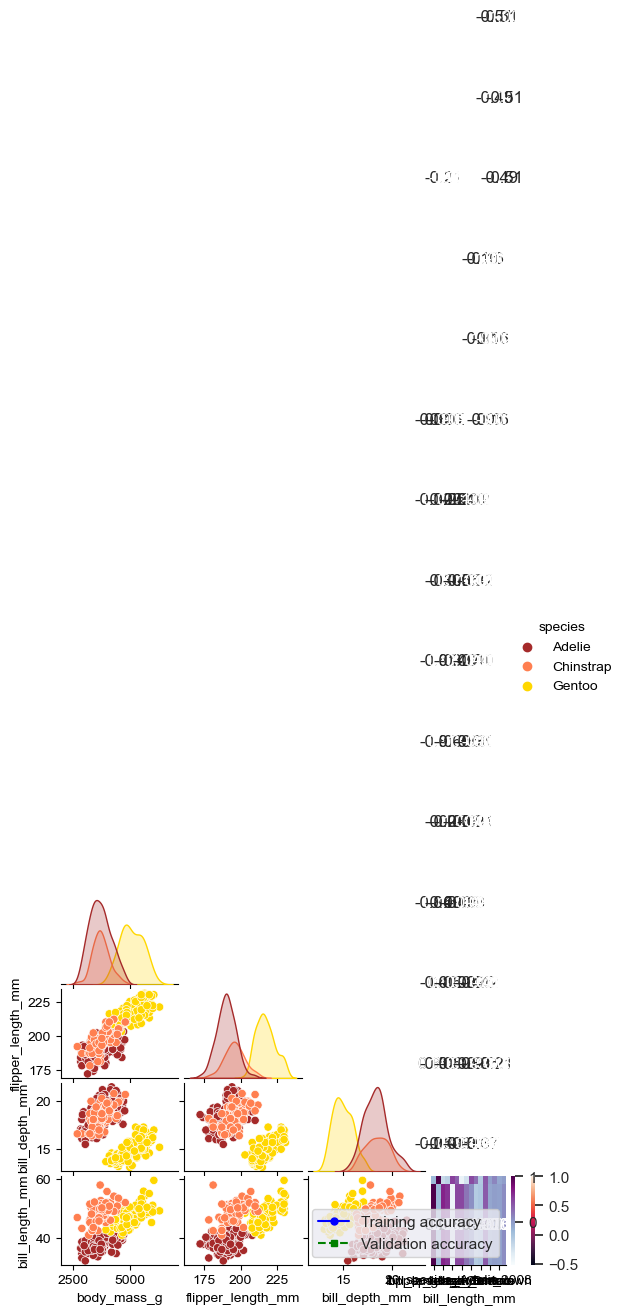

In [86]:
# Learning curve
plot_learning_curve(clf, x_train_imputed, y_train, scoring = 'accuracy', train_sizes = np.linspace(0.1, 1.0, 10), cv = 3)

In [87]:
# Visualising decision tree
best_dt = clf.best_estimator_
X = data.drop(['species'], axis = 1)
fig = plt.figure(figsize = (15, 10))
_ = tree.plot_tree(best_dt, 
                   feature_names = X.columns,  
                   filled = True)

In [88]:
# 5 most important features
get_features_importance(data, clf)

,Features,Importance
0,bill_length_mm,0.51
1,bill_depth_mm,0.34
2,body_mass_g,0.07
4,island_Dream,0.05
3,island_Biscoe,0.02


In [89]:
#5 least important features
get_features_importance_bottom(data, clf) # upravit vzalo prvních 5 nejvyšších

,Features,Importance
5,island_Torgersen,0.00
6,sex_male,0.00
3,island_Biscoe,0.02
4,island_Dream,0.05
2,body_mass_g,0.07


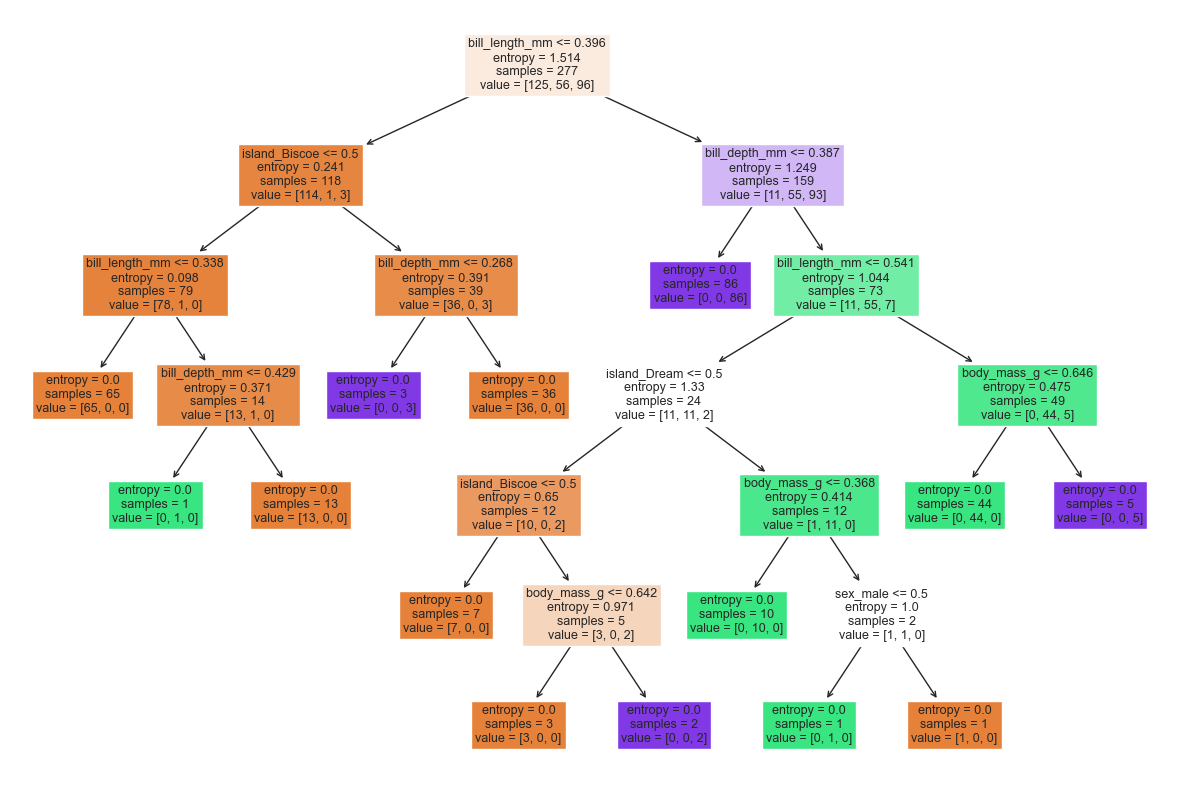

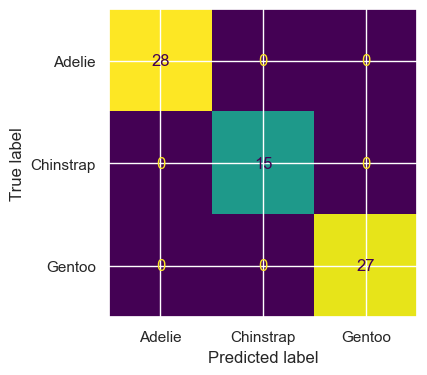

In [90]:
# Confusion matrix
y_pred = clf.predict(x_test_imputed)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels = clf.classes_)
fig, ax = plt.subplots(figsize = (4, 4))
cm_display.plot(ax = ax, colorbar = False)
plt.show()

### Random forest

In [91]:
# Hyperparameter tuning
# Fitting 3 folds for each of 288 candidates, totalling 864 fits
"""
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
"""

# Best params found:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80],
    'max_features': [2],
    'min_samples_leaf': [3],
    'min_samples_split': [8],
    'n_estimators': [200]
}

rf = RandomForestClassifier(random_state = seed) # instantiate random forest
RFC_GS = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2) # cross validation
y_pred_rfgc = evaluate_model(model = RFC_GS, model_name = "Random Forest Classifier", X_test = x_test_imputed, y_test = y_test, tuning = True)
df_results = pd.concat([df_results, new_row], ignore_index = True)

Fitting 3 folds for each of 1 candidates, totalling 3 fits

************ Random Forest Classifier ************

Best params found: {'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}

Accuracy: 99.0%
Precision: 98.0%
Recall: 99.0%
F1-score: 98.0%

***********************************************


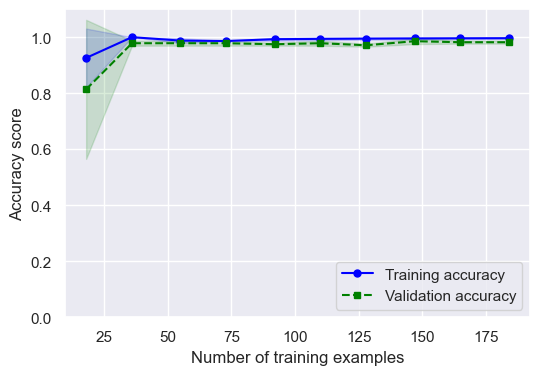

In [92]:
# Learning curve
plot_learning_curve(RFC_GS, x_train_imputed, y_train, scoring = 'accuracy', train_sizes = np.linspace(0.1, 1.0, 10), cv = 3)

In [93]:
# 5 most important features
get_features_importance(data, RFC_GS)

,Features,Importance
0,bill_length_mm,0.39
1,bill_depth_mm,0.22
2,body_mass_g,0.17
4,island_Dream,0.11
3,island_Biscoe,0.09


In [94]:
# 5 least important features
get_features_importance_bottom(data, RFC_GS)

,Features,Importance
6,sex_male,0.01
5,island_Torgersen,0.03
3,island_Biscoe,0.09
4,island_Dream,0.11
2,body_mass_g,0.17


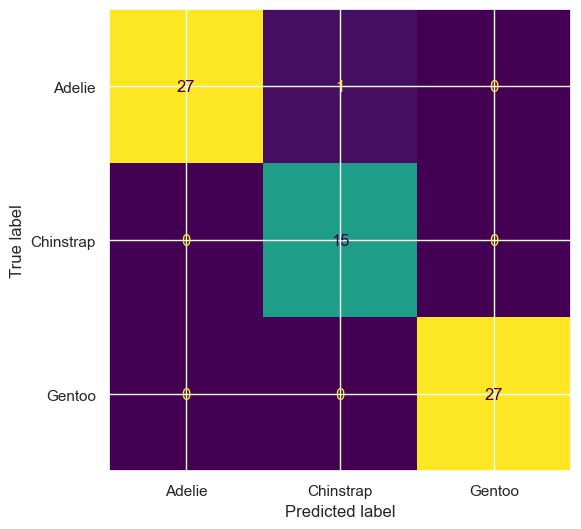

In [95]:
# Confusion matrix
y_pred = RFC_GS.predict(x_test_imputed)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels = clf.classes_)
fig, ax = plt.subplots(figsize = (6, 6))
cm_display.plot(ax = ax, colorbar = False)
plt.show()

### XGB Classifier

In [96]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [97]:
# Hyperparameter tuning
# Fitting 5 folds for each of 9 candidates, totalling 45 fits
params = {'n_estimators': stats.randint(150, 1000),
          'learning_rate': stats.uniform(0.01, 0.6),
          'min_child_weight': [1, 5, 10],
          'gamma': [0.5, 1, 1.5, 2, 5],
          'subsample': [0.6, 0.8, 1.0],
          'colsample_bytree': [0.6, 0.8, 1.0],
          'max_depth': [6, 7, 8, 9, 10]}

# Best params found: {'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.13083364655022833, 'max_depth': 9, 'min_child_weight': 5, 'n_estimators': 876, 'subsample': 1.0}

xgb = XGBClassifier(random_state = seed) # instantiate XGB
rs = RandomizedSearchCV(xgb, param_distributions = params, n_iter = 9, n_jobs = 4, cv = 5, verbose = 3, random_state = seed) # cross validation
evaluate_model(model = rs, model_name = "XGB Classifier", X_test = x_test_imputed, y_test = y_test, tuning = True)
df_results = pd.concat([df_results, new_row], ignore_index = True)

Fitting 5 folds for each of 9 candidates, totalling 45 fits

************ XGB Classifier ************

Best params found: {'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.13083364655022833, 'max_depth': 9, 'min_child_weight': 5, 'n_estimators': 876, 'subsample': 1.0}

Accuracy: 99.0%
Precision: 98.0%
Recall: 99.0%
F1-score: 98.0%

***********************************************


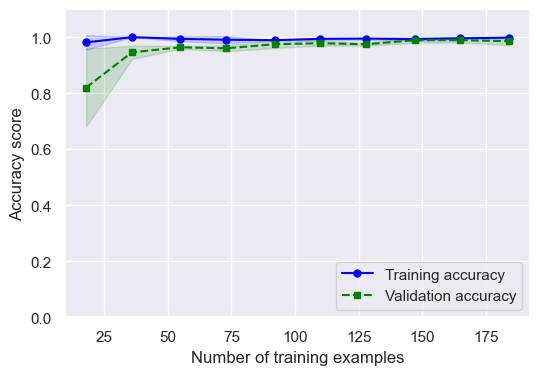

In [98]:
# Learning curve
plot_learning_curve(rs, x_train_imputed, y_train, scoring = 'accuracy', train_sizes = np.linspace(0.1, 1.0, 10), cv = 3)

In [99]:
# 5 most important features
get_features_importance(data, rs)

,Features,Importance
1,bill_depth_mm,0.24
4,island_Dream,0.24
0,bill_length_mm,0.21
3,island_Biscoe,0.15
2,body_mass_g,0.07


In [100]:
# 5 least important features
get_features_importance_bottom(data, rs)

,Features,Importance
5,island_Torgersen,0.04
6,sex_male,0.05
2,body_mass_g,0.07
3,island_Biscoe,0.15
0,bill_length_mm,0.21


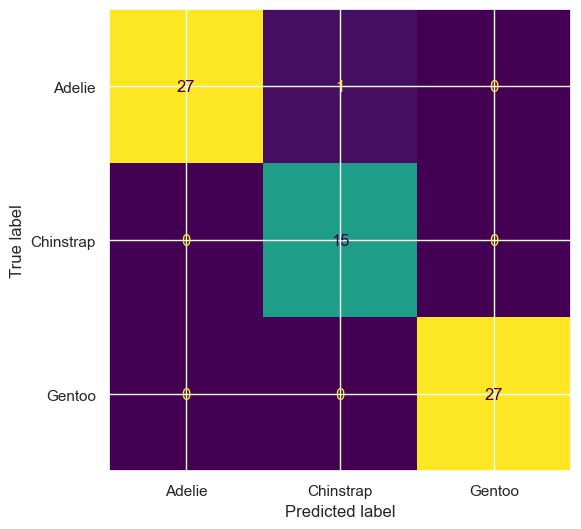

In [101]:
# Confusion matrix
y_pred = rs.predict(x_test_imputed)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
fig, ax = plt.subplots(figsize = (6, 6))
cm_display.plot(ax = ax, colorbar = False)
plt.show()

### Logistic regression

In [102]:
# Hyperparameter tuning
param_grid = {'penalty': ['l1','l2', 'elasticnet', 'none'], 
              'C': [1.0, 0.9, 0.8, 0.7, 0.6],
              'solver': ['newton-cg', 'lbfgs', 'liblinear']}

logreg = LogisticRegression(max_iter = 300, random_state = seed) # instantiate logistic regression
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5) # cross validation
evaluate_model(model = logreg_cv, model_name = "Logistic Regression", X_test = x_test_imputed, y_test = y_test, tuning = True)
df_results = pd.concat([df_results, new_row], ignore_index = True)


************ Logistic Regression ************

Best params found: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}

Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1-score: 100.0%

***********************************************


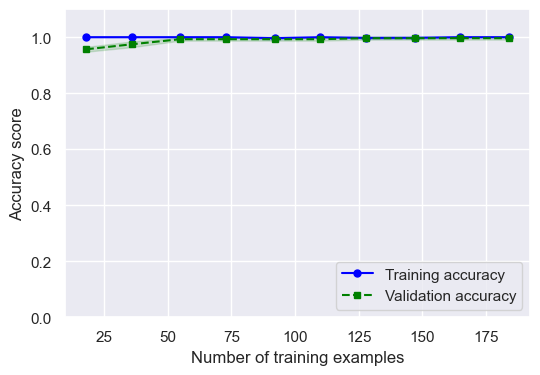

In [103]:
# Learning curve
plot_learning_curve(logreg_cv, x_train_imputed, y_train, scoring = 'accuracy', train_sizes = np.linspace(0.1, 1.0, 10), cv = 3)

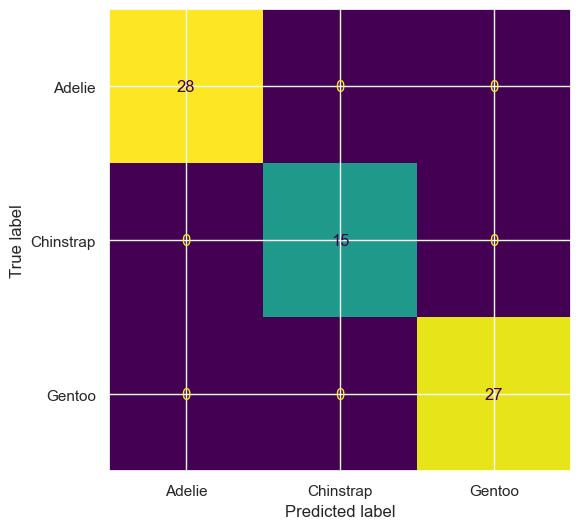

In [104]:
# Confusion Matrix
y_pred = logreg_cv.predict(x_test_imputed)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels = clf.classes_)
fig, ax = plt.subplots(figsize = (6, 6))
cm_display.plot(ax = ax, colorbar = False)
plt.show()

### Features and beta-coefficients

In [105]:
best_model = logreg_cv.best_estimator_ # Get the best estimator from the GridSearchCV result
train_class_labels = np.unique(y_train) # Get unique labels from your training set
class_names = {index: species for index, species in enumerate(le.classes_)} # LabelEncoder to identify and name classes
feature_names = list(x_train_imputed.columns)
beta_coeffs = best_model.coef_
intercept = best_model.intercept_

# Create a DataFrame with the intercepts
intercept_df = pd.DataFrame(intercept, columns=['Intercept']).T
intercept_df.columns = [class_names[label] for label in train_class_labels]

print(intercept_df)
# Create a DataFrame with the beta coefficients
beta_df = pd.DataFrame(beta_coeffs.T, index=feature_names, columns=[class_names[label] for label in train_class_labels])

# Melt the DataFrame to make it suitable for grouped bar plot
beta_melted = beta_df.reset_index().melt(id_vars='index', var_name='Species', value_name='Beta Coefficient')
beta_melted = beta_melted.rename(columns={'index': 'Feature'})

# Create the grouped bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=beta_melted, y='Feature', x='Beta Coefficient', hue='Species', palette='deep', ci=None, orient='h')
plt.ylabel("Features")
plt.xlabel("Beta Coefficients")
plt.title("Beta Coefficients for Logistic Regression")
plt.legend(title='Species')

# Add horizontal lines between features
for i, _ in enumerate(feature_names[:-1]):
    ax.axhline(i + 0.5, color='grey', linewidth=0.5)

plt.show()

NameError: name 'best_model' is not defined

Beta coefficients describe how much each feature contributes to predicting the target variable (penguin species). A positive beta coefficient suggests that an increase in the feature's value is linked to an increase in the probability of that particular penguin species.

The plot of the beta coefficients shows that **bill length** and **bill depth** are the most important features for predicting the species of penguins. For identifying Gentoo penguins, body mass and bill depth is a critical feature, while the island location is also significant in predicting the species.

## Evaluation

To evaluate the effectiveness of each model, we created a Confusion Matrix for every model and below each model we displayed four evaluation metrics:
* Accuracy
* Precision
* Recall (sensitivity)
* F1-score

These metrics are calculated for each class separately and then averaged, using macro-averaging method.

The Logistic Regression and Decision Tree performed both exceptionally well, achieving accuracy scores of 100%. Their precision, recall, and F1-score metrics were also excellent, indicating that these models did not make any false predictions and were highly effective at identifying penguin species. While the Random Forest and XGBoost models had slightly lower metrics, but they still performed reasonably well.

In [ ]:
df_results = df_results.applymap(lambda x: f'{x:.2f} %' if isinstance(x, (int, float)) else x)
df_results

,model,accuracy,precision,recall,f1
0,Decision Tree Classifier,100.00 %,100.00 %,100.00 %,100.00 %
1,Random Forest Classifier,99.00 %,98.00 %,99.00 %,98.00 %
2,XGB Classifier,99.00 %,98.00 %,99.00 %,98.00 %
3,Logistic Regression,100.00 %,100.00 %,100.00 %,100.00 %


## Conclusion

Based on the evaluation results, it appears that there are two models that score 100% on all metrics. In order to choose the most suitable model for our real-time case, we need to consider the advantages and disadvantages of each model. Therefore, we will carefully evaluate each model's performance and characteristics, taking into account factors such as interpretability, model complexity, scalability and assuptions.

**Interpretability**: Decision trees are often easier to interpret than logistic regression models. They provide a visual representation of the decision-making process. However, logistic regression models can be more interpretable when you only have a few predictors. There are only few predictors in our analysis. So the interpretability of both models is very similar.

**Model complexity**: Decision trees can easily become complex and overfit to the training data, which can result in poor performance on new data. Logistic regression, on the other hand, has a simpler structure that is less prone to overfitting.

**Scalability**: Logistic regression is generally faster and more efficient than decision trees, particularly when dealing with large datasets.

**Assumptions**: Logistic regression requires a linear connection between input features and the outcome's probability, while decision trees do not have any specific expectations about the relationship between inputs and outputs.


In [ ]:
table_data = {
    "Factors": ["Accuracy", "Interpretability", "Model complexity", "Scalability", "Assumptions", "Total Count"],
    "Logistic Regression": ["+", "+", "++", "++", "+",7],
    "Decision Trees": ["+", "+", "+", "+", "++", 6]
}

comparison_table = pd.DataFrame(table_data)
comparison_table.T

,0,1,2,3,4,5
Factors,Accuracy,Interpretability,Model complexity,Scalability,Assumptions,Total Count
Logistic Regression,+,+,++,++,+,7
Decision Trees,+,+,+,+,++,6


Both Logistic Regression and Decision Tree models are suitable for our case study. Because of these reasons we have decided to use Logistic Regression before Decision Tree. Mainly for its good interpretability, speed, efficiency and the fact that the Logistic Regression is less prone to overfitting.